In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
salaries = pd.read_csv('Resources/salaries_06302020_high_school.csv')
schools = pd.read_csv('Resources/School_Progress_Reports_SY1819_retention_rts.csv', encoding='iso-8859-1')
combined_df = pd.merge(salaries, schools, on = "School_ID", how = "left")
combined_df.columns.tolist()

['Pos #',
 'Dept ID',
 'School_ID',
 'Department',
 'FTE',
 'ClsIndc',
 'Annual Salary',
 'FTE Annual Salary',
 'Annual Benefit Cost',
 'JobCode',
 'Job Title',
 'Name',
 'Teacher_Retention',
 'Short_Name',
 'Long_Name',
 'School_Type',
 'Primary_Category',
 'Address',
 'City',
 'State',
 'Zip',
 'Phone',
 'Fax',
 'CPS_School_Profile',
 'Website',
 'Progress_Report_Year',
 'Blue_Ribbon_Award_Year',
 'Excelerate_Award_Gold_Year',
 'Spot_Light_Award_Year',
 'Improvement_Award_Year',
 'Excellence_Award_Year',
 'Student_Growth_Rating',
 'Student_Growth_Description',
 'Growth_Reading_Grades_Tested_Pct_ES',
 'Growth_Reading_Grades_Tested_Label_ES',
 'Growth_Math_Grades_Tested_Pct_ES',
 'Growth_Math_Grades_Tested_Label_ES',
 'Student_Attainment_Rating',
 'Student_Attainment_Description',
 'Attainment_Reading_Pct_ES',
 'Attainment_Reading_Lbl_ES',
 'Attainment_Math_Pct_ES',
 'Attainment_Math_Lbl_ES',
 'Culture_Climate_Rating',
 'Culture_Climate_Description',
 'School_Survey_Student_Response_Ra

# Is performance different at Charter Schools?

In [3]:
schools.groupby(schools["School_Type"]).count()

,School_ID,Teacher_Retention,Short_Name,Long_Name,Primary_Category,Address,City,State,Zip,Phone,...,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
School_Type,,,,,,,,,,,,,,,,,,,,,
Charter,65,55,65,65,65,65,65,65,65,65,...,60,60,63,63,41,41,41,41,41,41
Magnet,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,6,6,7,7,7,7
Neighborhood,46,44,46,46,46,46,46,46,46,46,...,44,44,45,45,45,45,44,44,44,44
Selective enrollment,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [28]:
#Attainment / Grad / etc
One_df = schools[["School_Type", 'Long_Name', 'Growth_PSAT_Grade_9_School_Pct', 'Growth_PSAT_Reading_Grade_10_School_Pct', 'Growth_PSAT_Math_Grade_10_School_Pct','Growth_SAT_Grade_11_School_Pct','College_Enrollment_School_Pct_Year_1','College_Enrollment_School_Pct_Year_2', 'Teacher_Retention', 'Attainment_SAT_Grade_11_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Graduation_4_Year_School_Pct_Year_1', 'Graduation_4_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_1']]
One_df = One_df.dropna()
One_df = One_df.loc[One_df["Teacher_Retention"] != 'NAN']
One_df['Teacher_Retention'] = pd.to_numeric(One_df['Teacher_Retention'])
variables = ['Attainment_SAT_Grade_11_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Graduation_4_Year_School_Pct_Year_1', 'Graduation_4_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_1','College_Enrollment_School_Pct_Year_1','College_Enrollment_School_Pct_Year_2']

for var in variables:
    One_df[var] = pd.to_numeric(One_df[var])
Ret = One_df.groupby(One_df["School_Type"])['Teacher_Retention', 'Attainment_SAT_Grade_11_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Graduation_4_Year_School_Pct_Year_1', 'Graduation_4_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_1'].mean()
Ret

<ipython-input-28-dc1c3deee581>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Ret = One_df.groupby(One_df["School_Type"])['Teacher_Retention', 'Attainment_SAT_Grade_11_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Graduation_4_Year_School_Pct_Year_1', 'Graduation_4_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_1'].mean()


,Teacher_Retention,Attainment_SAT_Grade_11_School_Pct,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_9_School_Pct,Graduation_4_Year_School_Pct_Year_1,Graduation_4_Year_School_Pct_Year_2,Graduation_5_Year_School_Pct_Year_2,Graduation_5_Year_School_Pct_Year_1
School_Type,,,,,,,,
Charter,0.453043,33.395652,41.626087,33.752174,78.043478,78.691304,81.456522,82.865217
Magnet,0.862500,36.475000,40.900000,42.475000,83.225000,80.100000,87.575000,83.950000
Neighborhood,0.844872,20.715385,25.584615,28.510256,67.987179,70.546154,72.153846,72.058974
Selective enrollment,0.913636,78.627273,85.418182,85.600000,92.854545,94.081818,94.772727,92.636364


In [29]:
#partition data to creat df with only high school data
high_school_data1 = schools.loc[(schools['Primary_Category']== "HS")]
Charter_high = high_school_data1.loc[(high_school_data1['School_Type']== "Charter")]
#partition data to creat df with only high school data
Neighborhood_high = high_school_data1.loc[(high_school_data1['School_Type']== "Neighborhood")]

## Is there a significant diference in teacher retention between Charter and Neighborhood schools?
null hypthesis: mu1 -mu2 = 0 
alternative hypothesis mu1-mu2 =/ 0

In [30]:
#Constructing a confidence interval
#separating by school type
Neighborhood_high = One_df.loc[(One_df['School_Type']== "Neighborhood")]
Charter_high = One_df.loc[(One_df['School_Type']== "Charter")]
#finding necessary values
mu1 = Neighborhood_high['Teacher_Retention'].mean()
std1 = Neighborhood_high['Teacher_Retention'].std()
n1 = Neighborhood_high['Teacher_Retention'].count()
mu2 = Charter_high['Teacher_Retention'].mean()
std2 = Charter_high['Teacher_Retention'].std()
n2 = Charter_high['Teacher_Retention'].count()

#the smaller of the two is the df
df = min(n1-1, n2-1)

t_crit = st.t.ppf(.95,df)
t_crit

Confidence_interval_ub = (mu1-mu2)+ t_crit * math.sqrt((std1/n1)+(std2/n2))
Confidence_interval_lb = (mu1-mu2)- t_crit * math.sqrt((std1/n1)+(std2/n2))

print(f'mu one is {mu1} and mu2 is {mu2}')
print(f'The confidence interval for Teacher Retention is from {Confidence_interval_ub} and mu2 is {Confidence_interval_lb}')

mu one is 0.844871794871795 and mu2 is 0.4530434782608695
The confidence interval for Teacher Retention is from 0.615983390189514 and mu2 is 0.16767324303233697


In [7]:
One_df

,School_Type,Long_Name,College_Enrollment_School_Pct_Year_1,College_Enrollment_School_Pct_Year_2,Teacher_Retention,Attainment_SAT_Grade_11_School_Pct,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_9_School_Pct,Graduation_4_Year_School_Pct_Year_1,Graduation_4_Year_School_Pct_Year_2,Graduation_5_Year_School_Pct_Year_2,Graduation_5_Year_School_Pct_Year_1
0,Charter,Acero Charter Schools - Major Hector P. Garcia MD,66.0,71.4,0.95,30.7,39.7,36.6,81.0,83.7,86.3,89.2
2,Selective enrollment,Albert G Lane Technical High School,86.9,92.6,0.94,97.2,97.9,98.5,95.7,95.1,96.5,95.5
7,Neighborhood,Benito Juarez Community Academy High School,52.2,62.8,0.91,11.6,19.6,26.1,79.7,78.5,82.8,78.6
8,Neighborhood,Carl Schurz High School,47.1,59.0,0.86,19.6,24.2,28.9,66.6,67.0,70.2,74.3
9,Neighborhood,Charles P Steinmetz College Preparatory HS,48.6,67.9,0.91,19.3,20.4,24.8,73.0,71.6,74.6,73.9
...,...,...,...,...,...,...,...,...,...,...,...,...
104,Selective enrollment,Whitney M Young Magnet High School,84.1,89.4,0.95,96.5,97.4,99.0,95.6,97.0,95.9,96.1
105,Neighborhood,William Howard Taft High School,66.4,78.5,0.95,45.6,59.3,63.1,83.0,80.4,85.8,87.2
106,Neighborhood,William J Bogan High School,47.7,58.1,0.80,8.5,20.9,12.7,66.9,73.7,81.4,71.4
107,Selective enrollment,William Jones College Preparatory High School,85.1,88.8,0.93,97.2,99.6,98.2,93.3,95.2,94.9,98.1


In [31]:
One_df['Attainment_SAT_Grade_11_School_Pct'] = pd.to_numeric(One_df['Attainment_SAT_Grade_11_School_Pct'])
Neighborhood_high = One_df.loc[(One_df['School_Type']== "Neighborhood")]
mu1 = Neighborhood_high['Attainment_SAT_Grade_11_School_Pct'].mean()
mu1


20.715384615384615

In [32]:
variables = ['Growth_PSAT_Grade_9_School_Pct', 'Growth_PSAT_Reading_Grade_10_School_Pct','Growth_PSAT_Math_Grade_10_School_Pct', 'Growth_SAT_Grade_11_School_Pct', 'Attainment_SAT_Grade_11_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Graduation_4_Year_School_Pct_Year_1', 'Graduation_4_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_1','College_Enrollment_School_Pct_Year_1','College_Enrollment_School_Pct_Year_2']


for var in variables: 
    mu1 = Neighborhood_high[var].mean()
    std1 = Neighborhood_high[var].std()
    n1 = Neighborhood_high[var].count()
    mu2 = Charter_high[var].mean()
    std2 = Charter_high[var].std()
    n2 = Charter_high[var].count()

    #the smaller of the two is the df
    df = min(n1-1, n2-1)

    t_crit = st.t.ppf(.95,df)
    

    Confidence_interval_ub = (mu1-mu2)+ t_crit * math.sqrt((std1/n1)+(std2/n2))
    Confidence_interval_lb = (mu1-mu2)- t_crit * math.sqrt((std1/n1)+(std2/n2))

    print(f'for {var} mu1 is {mu1} and mu2 is {mu2}')
    print(f'The confidence interval for {var} is from {Confidence_interval_ub} to {Confidence_interval_lb}')

#Keep line below

for Growth_PSAT_Grade_9_School_Pct mu1 is 39.666666666666664 and mu2 is 68.65217391304348
The confidence interval for Growth_PSAT_Grade_9_School_Pct is from -26.522893081454527 to -31.448121411299113
for Growth_PSAT_Reading_Grade_10_School_Pct mu1 is 68.56410256410257 and mu2 is 88.3913043478261
The confidence interval for Growth_PSAT_Reading_Grade_10_School_Pct is from -18.204588380809213 to -21.449815186637835
for Growth_PSAT_Math_Grade_10_School_Pct mu1 is 23.692307692307693 and mu2 is 47.82608695652174
The confidence interval for Growth_PSAT_Math_Grade_10_School_Pct is from -22.072991108358984 to -26.194567420069113
for Growth_SAT_Grade_11_School_Pct mu1 is 27.05128205128205 and mu2 is 68.95652173913044
The confidence interval for Growth_SAT_Grade_11_School_Pct is from -39.52417103535019 to -44.28630834034658
for Attainment_SAT_Grade_11_School_Pct mu1 is 20.715384615384615 and mu2 is 33.39565217391304
The confidence interval for Attainment_SAT_Grade_11_School_Pct is from -10.593015

In [33]:
# Perform the ANOVA
variables = ['Growth_PSAT_Grade_9_School_Pct', 'Growth_PSAT_Reading_Grade_10_School_Pct','Growth_PSAT_Math_Grade_10_School_Pct', 'Growth_SAT_Grade_11_School_Pct','Attainment_SAT_Grade_11_School_Pct', 'Attainment_PSAT_Grade_10_School_Pct', 'Attainment_PSAT_Grade_9_School_Pct', 'Graduation_4_Year_School_Pct_Year_1', 'Graduation_4_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_2', 'Graduation_5_Year_School_Pct_Year_1','College_Enrollment_School_Pct_Year_1','College_Enrollment_School_Pct_Year_2']

for var in variables:
    group1 = Neighborhood_high[var]
    group2 = Charter_high[var]
    anova = st.f_oneway(group1, group2)
    print(f'anova for {var} is {anova}')

anova for Growth_PSAT_Grade_9_School_Pct is F_onewayResult(statistic=13.298462944898583, pvalue=0.0005572271801461254)
anova for Growth_PSAT_Reading_Grade_10_School_Pct is F_onewayResult(statistic=27.959838163898223, pvalue=1.8280608471581803e-06)
anova for Growth_PSAT_Math_Grade_10_School_Pct is F_onewayResult(statistic=24.50821127957191, pvalue=6.333755533621169e-06)
anova for Growth_SAT_Grade_11_School_Pct is F_onewayResult(statistic=38.112095652490254, pvalue=6.292511118100102e-08)
anova for Attainment_SAT_Grade_11_School_Pct is F_onewayResult(statistic=5.745039274157721, pvalue=0.019667153341529915)
anova for Attainment_PSAT_Grade_10_School_Pct is F_onewayResult(statistic=8.352211156307629, pvalue=0.005354691394657638)
anova for Attainment_PSAT_Grade_9_School_Pct is F_onewayResult(statistic=1.0171652077523146, pvalue=0.31724244926959705)
anova for Graduation_4_Year_School_Pct_Year_1 is F_onewayResult(statistic=10.25873015423438, pvalue=0.002178333383983586)
anova for Graduation_4_

## Attainment in Neighborhood Schools v Salary
Does Teacher Salary predict test scores?
# Hypotheses
Null Hypothesis: Teacher Salary will have no effect on Test Scores.
Alternative Hypothesis: Teacher Salary doesn't have no effect on Test Scores.

The correlation is 0.25529770106550764


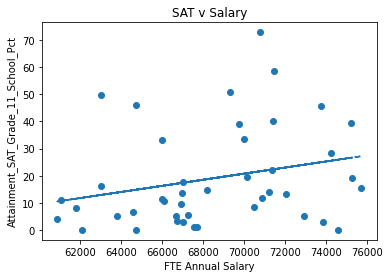

In [11]:
#11th Grade Data
#Make 11th grade_df
ele_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Attainment_SAT_Grade_11_School_Pct', ]]
cleaned_df = ele_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Attainment_SAT_Grade_11_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Attainment_SAT_Grade_11_School_Pct')
plt.title('SAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

The correlation is 0.24210084279894326


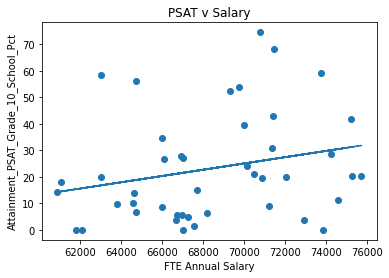

In [12]:
#10th Grade Data
#Make 11th grade_df
ele_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Attainment_PSAT_Grade_10_School_Pct']]
cleaned_df = ele_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Attainment_PSAT_Grade_10_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Attainment_PSAT_Grade_10_School_Pct')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

The correlation is 0.26631266450384394


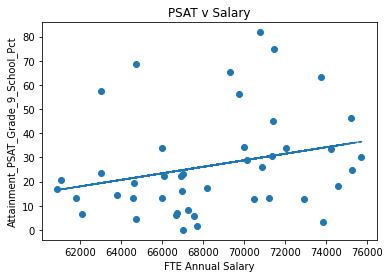

In [13]:
# 9th grade data
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Attainment_PSAT_Grade_9_School_Pct']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Attainment_PSAT_Grade_9_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Attainment_PSAT_Grade_9_School_Pct')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

# Will teacher salaries predict college enrollment?

The correlation is 0.3339362189282251


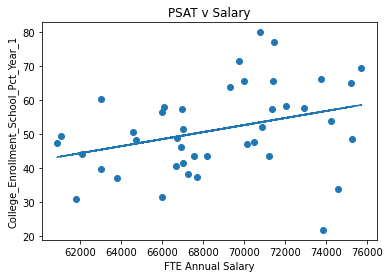

In [14]:
# 9th grade data
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'College_Enrollment_School_Pct_Year_1']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['College_Enrollment_School_Pct_Year_1']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('College_Enrollment_School_Pct_Year_1')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

The correlation is 0.2739568014907354


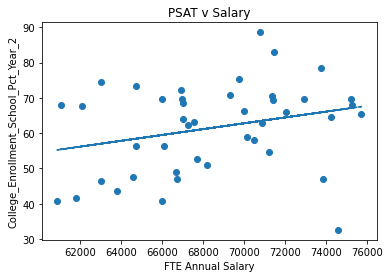

In [15]:
# 9th grade data
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'College_Enrollment_School_Pct_Year_2']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['College_Enrollment_School_Pct_Year_2']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('College_Enrollment_School_Pct_Year_2')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

# Will teacher salaries predict graduation rates?

The correlation is 0.3022533224046132


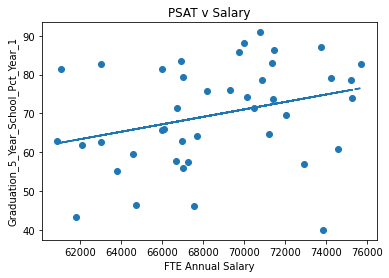

In [16]:
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Graduation_5_Year_School_Pct_Year_1']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Graduation_5_Year_School_Pct_Year_1']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Graduation_5_Year_School_Pct_Year_1')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

The correlation is 0.30676443567574885


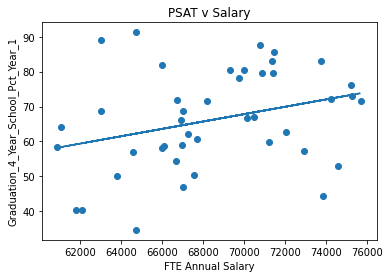

In [17]:
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Graduation_4_Year_School_Pct_Year_1']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Graduation_4_Year_School_Pct_Year_1']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Graduation_4_Year_School_Pct_Year_1')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

In [18]:
Charter_high["Attainment_SAT_Grade_11_School_Pct"].var()

547.1522529644268

In [19]:
Charter_high["Attainment_SAT_Grade_11_School_Pct"].mean()

33.39565217391304

In [20]:
Neighborhood_high["Attainment_SAT_Grade_11_School_Pct"].mean()

19.775609756097563

In [21]:
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
critical_value

NameError: name 'stats' is not defined

In [ ]:
# Run the chi square test with stats.chisquare()
stats.chisquare(20.971,19.505)

In [ ]:
Charter_high["Growth_SAT_Math_Grade_11_School_Pct"].mean()

In [ ]:
Neighborhood_high["Growth_SAT_Math_Grade_11_School_Pct"].mean()

In [ ]:
Neighborhood_high["Growth_SAT_Reading_Grade_11_School_Pct"].mean()

In [ ]:
Charter_high["Growth_SAT_Reading_Grade_11_School_Pct"].mean()

In [ ]:
# # Start by getting the last (greatest) timepoint for each mouse
# grouped_Max = drug_data.groupby('Mouse ID')
# Maxes = grouped_Max['Timepoint'].max()
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Max_Vol = pd.merge(Maxes, drug_data, on=['Mouse ID', 'Timepoint'], how='left')
# Max_Vol

In [ ]:
# Using GroupBy in order to separate the data into fields according to school name
grouped2school_school_df = combined062020_df.groupby(['School_ID', 'Long_Name', 'Job Title'])
# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped2school_school_df)
# In order to be visualized, a data function must be used...
grouped2school_school_df.count()